# Table of Contents
 <p><div class="lev1"><a href="#GrIS-fall-&quot;shutdown&quot;-events">GrIS fall "shutdown" events</a></div><div class="lev1"><a href="#1.-Summary">1. Summary</a></div><div class="lev1"><a href="#2.-Fall-2011">2. Fall 2011</a></div><div class="lev1"><a href="#3.-Fall-2012">3. Fall 2012</a></div><div class="lev1"><a href="#4.-Fall-2013">4. Fall 2013</a></div><div class="lev1"><a href="#5.-Fall-2014">5. Fall 2014</a></div><div class="lev1"><a href="#6.-Fall-2015">6. Fall 2015</a></div><div class="lev1"><a href="#7.-Fall-2016">7. Fall 2016</a></div><div class="lev1"><a href="#8.-Fall-2017">8. Fall 2017</a></div><div class="lev1"><a href="#9.-Winter-speedup">9. Winter speedup</a></div>

In [59]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="View raw code"></form>''')

Use toggle button to view raw code if desired.

In [60]:
%matplotlib inline

# GrIS fall "shutdown" events

**Prepared for UM QSSI**

**Patrick Wright, *Inversion Labs***

**January 9, 2018**

# 1. Summary

Each plot below includes a list of characteristics that define the event(s). In addition, I list interpretations of processes that are completely qualitative and based on ideas from the literature.

* All plots are local time (UTC-2).
* GPS velocities are calculated using J. Brown's position data (binning / smoothing details listed below each plot). I have dropped periods of obvious bad velocity data. Once we decide on a direction for continued analysis, I can fine-tune the velocity calculations for each period of interest, and potentially make some improvements by addressing specific outlier positions.
* Melt production is modified temperature index (MTI) and does not include rain totals.
* Melt production totals are plotted at midnight (00:00) for the following melt day (i.e. melt occurring during the day is plotted at the preceeding midnight tick mark). This make it difficult to directly interpret timing. For example, velocity peaks commonly occur late in the evening hours, whereas the melt spike is plotted for the previous midnight, so that melt/velocity spikes can appear to be offset by 20-24 hrs. The actual offset in this scenario is likely 6-8 hrs. See the event on 2012-09-11 for an example.
* Likewise, rain totals are plotted at midnight representing rain totals for the following day.
 

# 2. Fall 2011

In [61]:
#!/usr/bin/env python

"""
Analysis of Fall 2011 GPS, pressure, and melt
Patrick Wright, Inversion Labs
Job: UM QSSI
Jan. 2018
"""

import datetime as dt
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib import rcParams
from dateutil.relativedelta import relativedelta
import pylab
from IPython import embed
from math import factorial
from datetime import timedelta

# Convert DOY to datetime:
def dateparser_2011(doy):
  return dt.datetime(year=2011, month=1, day=1) + dt.timedelta(days=doy) - dt.timedelta(days=1)

# set index of dataframes to datetime:
def set_index(df):
  index = pd.to_datetime(df.Datetime)
  df = df.set_index(index)
  df.index.rename('Datetime_index', inplace=True)
  df = df.drop('Datetime', axis=1)
  return df

# ------------------------------------------------------------------------------
# VELOCITY IMPORTS:
# ------------------------------------------------------------------------------

vel1 = pd.read_csv('velocity/processed/27km-11_velocity.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel1_index = pd.to_datetime(vel1['timestamp'])
vel1_index.name = 'datetimeindex'
vel1 = vel1.set_index(vel1_index)
vel1 = vel1.drop('timestamp', axis=1)

# drop suspect periods:
vel1['2011-08-21 12:00':'2011-08-22 18:00'] = np.NaN
vel1['2011-09-04 15:00':'2011-09-06 13:00'] = np.NaN
vel1['2011-09-09 11:00':'2011-09-10 12:00'] = np.NaN
vel1['2011-09-13 21:00':'2011-09-15'] = np.NaN

vel2 = pd.read_csv('velocity/processed/46km-11_velocity.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel2_index = pd.to_datetime(vel2['timestamp'])
vel2_index.name = 'datetimeindex'
vel2 = vel2.set_index(vel2_index)
vel2 = vel2.drop('timestamp', axis=1)

# drop suspect periods:
vel2['2011-08-04 12:00':'2011-08-06 03:00'] = np.NaN
vel2['2011-08-21 12:00':'2011-08-23'] = np.NaN
vel2['2011-09-05 03:00':'2011-09-06'] = np.NaN

# ------------------------------------------------------------------------------
# PRESSURE IMPORTS:
# ------------------------------------------------------------------------------

# NOTE: These pressure data are from '~/UM_RESEARCH/water_pressure/Pressure_data_PJWpublication'
#       (this directory is replicated on Box)
# NOTE: No resample / interpolate.... just for viewing trends. Data could have uneven sampling.

GL11_1A = pd.read_csv('pressure/GL11-1A.txt', sep=' ',skipinitialspace=True, header=None, names=['DOY', 'm_h2o'])
GL11_1A_index = GL11_1A['DOY'].map(dateparser_2011) # make a datetime index
GL11_1A_index.name = 'timestamp' # change name of index
GL11_1A_dt = GL11_1A.set_index(GL11_1A_index) # set index to datetime, re-name
GL11_1A_scaled = (9.81 * 1000. * GL11_1A_dt.m_h2o)  / (910. * 9.81 * 457.5) # pgh water column / pgh ice
GL11_1A_scaled.name = 'scaled' # change name of series

GL11_1B = pd.read_csv('pressure/GL11-1B.txt', sep=' ',skipinitialspace=True, header=None, names=['DOY', 'm_h2o'])
GL11_1B_index = GL11_1B['DOY'].map(dateparser_2011) # make a datetime index
GL11_1B_index.name = 'timestamp' # change name of index
GL11_1B_dt = GL11_1B.set_index(GL11_1B_index) # set index to datetime, re-name
GL11_1B_scaled = (9.81 * 1000. * GL11_1B_dt.m_h2o)  / (910. * 9.81 * 466.) # pgh water column / pgh ice
GL11_1B_scaled.name = 'scaled' # change name of series

GL11_1C = pd.read_csv('pressure/GL11-1C.txt', sep=' ',skipinitialspace=True, header=None, names=['DOY', 'm_h2o'])
GL11_1C_index = GL11_1C['DOY'].map(dateparser_2011) # make a datetime index
GL11_1C_index.name = 'timestamp' # change name of index
GL11_1C_dt = GL11_1C.set_index(GL11_1C_index) # set index to datetime, re-name
GL11_1C_scaled = (9.81 * 1000. * GL11_1C_dt.m_h2o)  / (910. * 9.81 * 459.5) # pgh water column / pgh ice
GL11_1C_scaled.name = 'scaled' # change name of series

GL11_2B = pd.read_csv('pressure/GL11-2B.txt', sep=' ',skipinitialspace=True, header=None, names=['DOY', 'm_h2o'])
GL11_2B_index = GL11_2B['DOY'].map(dateparser_2011) # make a datetime index
GL11_2B_index.name = 'timestamp' # change name of index
GL11_2B_dt = GL11_2B.set_index(GL11_2B_index) # set index to datetime, re-name
GL11_2B_scaled = (9.81 * 1000. * GL11_2B_dt.m_h2o)  / (910. * 9.81 * 821.) # pgh water column / pgh ice
GL11_2B_scaled.name = 'scaled' # change name of series

GL11_2D = pd.read_csv('pressure/GL11-2D.txt', sep=' ',skipinitialspace=True, header=None, names=['DOY', 'm_h2o'])
GL11_2D_index = GL11_2D['DOY'].map(dateparser_2011) # make a datetime index
GL11_2D_index.name = 'timestamp' # change name of index
GL11_2D_dt = GL11_2D.set_index(GL11_2D_index) # set index to datetime, re-name
GL11_2D_scaled = (9.81 * 1000. * GL11_2D_dt.m_h2o)  / (910. * 9.81 * 814.5) # pgh water column / pgh ice
GL11_2D_scaled.name = 'scaled' # change name of series

# ------------------------------------------------------------------------------
# MELT PRODUCTION IMPORTS: NOTE: Files replaced on 12/1/17
# ------------------------------------------------------------------------------
GL11_1_melt = pd.read_csv('melt/melt_MTI_27km-11.csv', sep=',', header=0, names=['Datetime', 'optimized_mti'])
GL11_1_melt_index = pd.to_datetime(GL11_1_melt['Datetime'])
GL11_1_melt_index.name = 'timestamp'
GL11_1_melt = GL11_1_melt.set_index(GL11_1_melt_index)
GL11_1_melt = GL11_1_melt.drop('Datetime', axis=1)

GL11_2_melt = pd.read_csv('melt/melt_MTI_46km-11.csv', sep=',', header=0, names=['Datetime', 'optimized_mti'])
GL11_2_melt_index = pd.to_datetime(GL11_2_melt['Datetime'])
GL11_2_melt_index.name = 'timestamp'
GL11_2_melt = GL11_2_melt.set_index(GL11_2_melt_index)
GL11_2_melt = GL11_2_melt.drop('Datetime', axis=1)

# ------------------------------------------------------------------------------
# PLOTS:
# ------------------------------------------------------------------------------

# MULTI-PANEL: velocity, pressure, melt

fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot2grid((3, 1), (0, 0)) # GPS (GL11-1 & GL11-2)
ax2 = plt.subplot2grid((3, 1), (1, 0)) # water pressure (GL11-1 & GL11-2, all holes)
ax3 = plt.subplot2grid((3, 1), (2, 0)) # melt production (GL11-1 & GL11-2) -- paired bars?

ax1.plot(vel1.index, vel1.velocity_myear, color='r', label='27km-11')
ax1.plot(vel2.index, vel2.velocity_myear, color='b', label='46km-11')
ax1.set_xlim('2011-08-01','2011-10-15')
#ax1.set_xlim('2011-08-23','2011-09-03')
ax1.set_ylim(50,225)
ax1.set_ylabel('velocity (m/yr)')
ax1.tick_params(axis='x', labelbottom='off')
ax1.legend(loc='upper right')
ax1.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax1.annotate('GPS Velocity', (mdates.datestr2num('2011-08-02'), 210), style='oblique')


ax2.plot(GL11_1A_dt.index, GL11_1A_scaled, color='r', label='27km-11', linewidth=1)
ax2.plot(GL11_1B_dt.index, GL11_1B_scaled, color='r', label='', linewidth=1)
ax2.plot(GL11_1C_dt.index, GL11_1C_scaled, color='r', label='', linewidth=1)
ax2.plot(GL11_2B_dt.index, GL11_2B_scaled, color='b', label='46km-11', linewidth=1)
ax2.plot(GL11_2D_dt.index, GL11_2D_scaled, color='b', label='', linewidth=1)
ax2.set_xlim('2011-08-01','2011-10-15')
#ax2.set_xlim('2011-08-23','2011-09-03')
ax2.tick_params(axis='x', labelbottom='off')
ax2.set_ylim(0.82,1.05)
#ax2.set_ylim(0.935,1.01)
ax2.set_ylabel('pressure (fract OB)')
plt.setp(ax2.get_yticklabels()[0], visible=False)
ax2.legend(loc='upper right')
ax2.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax2.annotate('Water Pressure', (mdates.datestr2num('2011-08-02'), 1.03), style='oblique')

WIDTH = 0.3
# align can only be 'center' or 'edge', where 'edge' uses left edge of bar at corresponding index
# This implementation plots bars at midnight, representing melt over following day.
ax3.bar(GL11_1_melt.index -  pd.DateOffset(days=0.15), GL11_1_melt.optimized_mti,
        width=WIDTH, edgecolor='black', color='red', align='center', label='27km-11')
ax3.bar(GL11_2_melt.index +  pd.DateOffset(days=0.15), GL11_2_melt.optimized_mti,
        width=WIDTH, edgecolor='black', color='blue', align='center', label='46km-11')
ax3.xaxis_date()
ax3.set_ylabel('melt (m/day)')
ax3.set_xlim('2011-08-01','2011-10-15')
#ax3.set_xlim('2011-08-23','2011-09-03')
ax3.set_ylim(0,0.05)
ax3.legend(loc='upper right')
ax3.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax3.annotate('Melt Production (MTI)', (mdates.datestr2num('2011-08-02'), 0.045), style='oblique')

plt.subplots_adjust(wspace=0.001, hspace=0.001)
plt.subplots_adjust(
  left=0.085, right=0.95,
  top=0.95, bottom=0.13)

plt.xticks(rotation=90, fontsize=10)

plt.show()

APPLIED (GPS): remove error >2 cm / 15-min bin / 8-hr pos smooth / 8-hr vel / 8-hr vel smooth

**Characteristics:**
 
* Rapid velocity increase coinciding w/ melt production that persists for several days ("Doyle event"). 
* Increased velocity at inland site 46km-11 is sustained 2-3 days longer than 27km-11.
* At 27km-11, increase in pressure leading up to event, pressure decrease during peak velocity period, and then pressure increase after the event.
* At 46km-11, variable pressure with perhaps a slight pressure decrease during event, then increasing pressure after the event. Need to view 46km-11 pressure at a smaller scale to get better sense of change. 
    

**Interpretation (process):**

* Boreholes at both sites may represent "isolated" or "weakly connected" hydraulic regimes, with poor connection to the active system.
* Pressure variations are mostly responding to the sliding event (cavity opening?) rather than driving the event.
* Site 27km-11 has potential to constrain the lateral influence of the active system away from the trough axis (i.e. the active system loses direct hydraulic influence <1 km away from trough axis).

# 3. Fall 2012

In [62]:
#!/usr/bin/env python

"""
Analysis of Fall 2012 GPS, pressure, and melt
Patrick Wright, Inversion Labs
Job: UM QSSI
Jan. 2018
"""

import datetime as dt
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib import rcParams
from dateutil.relativedelta import relativedelta
import pylab
from IPython import embed
from math import factorial
from datetime import timedelta

# Convert DOY to datetime:
def dateparser_2012(doy):
  return dt.datetime(year=2012, month=1, day=1) + dt.timedelta(days=doy) - dt.timedelta(days=1)

# set index of dataframes to datetime:
def set_index(df):
  index = pd.to_datetime(df.Datetime)
  df = df.set_index(index)
  df.index.rename('Datetime_index', inplace=True)
  df = df.drop('Datetime', axis=1)
  return df

# ------------------------------------------------------------------------------
# VELOCITY IMPORTS:
# ------------------------------------------------------------------------------

vel1 = pd.read_csv('velocity/processed/27km-12_velocity.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel1_index = pd.to_datetime(vel1['timestamp'])
vel1_index.name = 'datetimeindex'
vel1 = vel1.set_index(vel1_index)
vel1 = vel1.drop('timestamp', axis=1)

# drop suspect periods:
vel1['2012-09-07 11:00':'2012-09-08 09:00'] = np.NaN
vel1['2012-09-18 11:00': '2012-09-19 11:00'] = np.NaN


vel2 = pd.read_csv('velocity/processed/27km-11_velocity.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel2_index = pd.to_datetime(vel2['timestamp'])
vel2_index.name = 'datetimeindex'
vel2 = vel2.set_index(vel2_index)
vel2 = vel2.drop('timestamp', axis=1)

# ------------------------------------------------------------------------------
# PRESSURE IMPORTS:
# ------------------------------------------------------------------------------

# NOTE: These pressure data are from '~/UM_RESEARCH/water_pressure/Pressure_data_PJWpublication'
#       (this directory is replicated on Box)
# NOTE: No resample / interpolate.... just for viewing trends. Data could have uneven sampling.

GL12_2A = pd.read_csv('pressure/GL12-2A.txt', sep='	', header=None, names=['DOY', 'm_h2o'])
GL12_2A_index = GL12_2A['DOY'].map(dateparser_2012) # make a datetime index
GL12_2A_index.name = 'timestamp' # change name of index
GL12_2A_dt = GL12_2A.set_index(GL12_2A_index) # set index to datetime, re-name
GL12_2A_scaled = (9.81 * 1000. * GL12_2A_dt.m_h2o)  / (910. * 9.81 * 695.5) # pgh water column / pgh ice
GL12_2A_scaled.name = 'scaled' # change name of series

GL12_2C = pd.read_csv('pressure/GL12-2C.txt', sep=' ',skipinitialspace=True, header=None, names=['DOY', 'm_h2o'])
GL12_2C_index = GL12_2C['DOY'].map(dateparser_2012) # make a datetime index
GL12_2C_index.name = 'timestamp' # change name of index
GL12_2C_dt = GL12_2C.set_index(GL12_2C_index) # set index to datetime, re-name
GL12_2C_scaled = (9.81 * 1000. * GL12_2C_dt.m_h2o)  / (910. * 9.81 * 688.) # pgh water column / pgh ice
GL12_2C_scaled.name = 'scaled' # change name of series

GL12_2D = pd.read_csv('pressure/GL12-2D.txt', sep=' ',skipinitialspace=True, header=None, names=['DOY', 'm_h2o'])
GL12_2D_index = GL12_2D['DOY'].map(dateparser_2012) # make a datetime index
GL12_2D_index.name = 'timestamp' # change name of index
GL12_2D_dt = GL12_2D.set_index(GL12_2D_index) # set index to datetime, re-name
GL12_2D_scaled = (9.81 * 1000. * GL12_2D_dt.m_h2o)  / (910. * 9.81 * 696.) # pgh water column / pgh ice
GL12_2D_scaled.name = 'scaled' # change name of series

# ------------------------------------------------------------------------------
# MELT PRODUCTION IMPORTS: NOTE: Files replaced on 12/1/17
# ------------------------------------------------------------------------------
GL11_1_melt = pd.read_csv('melt/melt_MTI_27km-11.csv', sep=',', header=0, names=['Datetime', 'optimized_mti'])
GL11_1_melt_index = pd.to_datetime(GL11_1_melt['Datetime'])
GL11_1_melt_index.name = 'timestamp'
GL11_1_melt = GL11_1_melt.set_index(GL11_1_melt_index)
GL11_1_melt = GL11_1_melt.drop('Datetime', axis=1)

GL12_2_melt = pd.read_csv('melt/melt_MTI_27km-12.csv', sep=',', header=0, names=['Datetime', 'optimized_mti'])
GL12_2_melt_index = pd.to_datetime(GL12_2_melt['Datetime'])
GL12_2_melt_index.name = 'timestamp'
GL12_2_melt = GL12_2_melt.set_index(GL12_2_melt_index)
GL12_2_melt = GL12_2_melt.drop('Datetime', axis=1)

# ------------------------------------------------------------------------------
# PLOTS:
# ------------------------------------------------------------------------------

# MULTI-PANEL: velocity, pressure, melt

fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot2grid((3, 1), (0, 0)) # GPS 
ax2 = plt.subplot2grid((3, 1), (1, 0)) # water pressure 
ax3 = plt.subplot2grid((3, 1), (2, 0)) # melt production

ax1.plot(vel1.index, vel1.velocity_myear, color='r', label='27km-12')
ax1.plot(vel2.index, vel2.velocity_myear, color='b', label='27km-11')
ax1.set_xlim('2012-08-01','2012-10-15')
ax1.set_ylim(45,280)
ax1.set_ylabel('velocity (m/yr)')
ax1.tick_params(axis='x', labelbottom='off')

#ax1.yaxis.set_tick_params(labelsize=12)
ax1.legend(loc='upper right')
ax1.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax1.annotate('GPS Velocity', (mdates.datestr2num('2012-08-02'), 265), style='oblique')


ax2.plot(GL12_2D_dt.index, GL12_2D_scaled, color='r', alpha=0.95, label='27km-12D', linewidth=1)
ax2.plot(GL12_2C_dt.index, GL12_2C_scaled, color='r', alpha=0.65, label='27km-12C', linewidth=1)
ax2.plot(GL12_2A_dt.index, GL12_2A_scaled, color='r', alpha=0.4, label='27km-12A', linewidth=1)

ax2.set_xlim('2012-08-01','2012-10-15')
ax2.tick_params(axis='x', labelbottom='off')
ax2.set_ylim(0.75,1.08)
#ax2.set_ylim(0.935,1.01)
ax2.set_ylabel('pressure (fract OB)')

plt.setp(ax2.get_yticklabels()[0], visible=False)

#ax2.yaxis.set_tick_params(labelsize=12)
ax2.legend(loc='lower right')
ax2.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax2.annotate('Water Pressure', (mdates.datestr2num('2012-08-02'), 1.06), style='oblique')

WIDTH = 0.3
# align can only be 'center' or 'edge', where 'edge' uses left edge of bar at corresponding index
# This implementation plots bars at midnight, representing melt over following day.
ax3.bar(GL12_2_melt.index +  pd.DateOffset(days=0.15), GL12_2_melt.optimized_mti,
        width=WIDTH, edgecolor='black', color='red', align='center', label='27km-12')
ax3.bar(GL11_1_melt.index -  pd.DateOffset(days=0.15), GL11_1_melt.optimized_mti,
        width=WIDTH, edgecolor='black', color='blue', align='center', label='27km-11')
ax3.xaxis_date()
ax3.set_ylabel('melt (m/day)')
ax3.set_xlim('2012-08-01','2012-10-15')
ax3.set_ylim(0,0.070)
#ax3.tick_params(axis='x', labelbottom='off')

ax3.legend(loc='upper right')
ax3.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax3.annotate('Melt Production (MTI)', (mdates.datestr2num('2012-08-06'), 0.065), style='oblique')

plt.subplots_adjust(wspace=0.001, hspace=0.001)
plt.subplots_adjust(
  left=0.085, right=0.95,
  top=0.95, bottom=0.13)

#plt.legend()

plt.xticks(rotation=90, fontsize=10)

#plt.savefig('meltvelocity.svg', format='svg')

plt.show()

APPLIED (GPS): remove error >2 cm / 15-min bin / 8-hr pos smooth / 8-hr vel / 8-hr vel smooth

**Characteristics:**
 
* Three speed-up events, each 1-2 days in length. 
* Pressure in hole 12C is well-correlated with velocity (both increase and decrease together).
* Pressure in hole 12D seems to be a muted version of the 12C relationship.
* Pressure in hole 12A is variable -- difficult to directly compare to velocity changes.
* First 2 events show corresponding melt production. Why no melt production for 3rd event? Ave temp < 0 ?

**Interpretation (process):**

* The 12C borehole pressure record demonstrates connection to the "active" system.
* I would expect all boreholes drilled at 27km-12 to show better hydraulic connectivity and more similar trends between the pressure records...? Does this say that despite being in an active regime, there are still semi-isolated patches at the bed? Certain patches are becoming isolated with creep closure during the fall?
* Unlike other sites, 27km-12 generally has in-phase timing between diurnal cycles of pressure and velocity throughout the melt season.  27km-12 also shows the lowest diurnal minimum velocities (near 50 m/yr), the lowest median melt season velocity, and has the largest diurnal range in pressure among boreholes (except margin hole). This supports the idea of borehole connectivity to an active system?
* Velocity increases seem to slightly precede pressure increases at 27km-12. This may be due to longitudinal coupling with areas downstream that are activated earlier in the day?

# 4. Fall 2013

NO ANALYSIS COMPLETED. We have water pressure in 3 boreholes at 27km-12, but the GPS records are no good.

# 5. Fall 2014

In [63]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

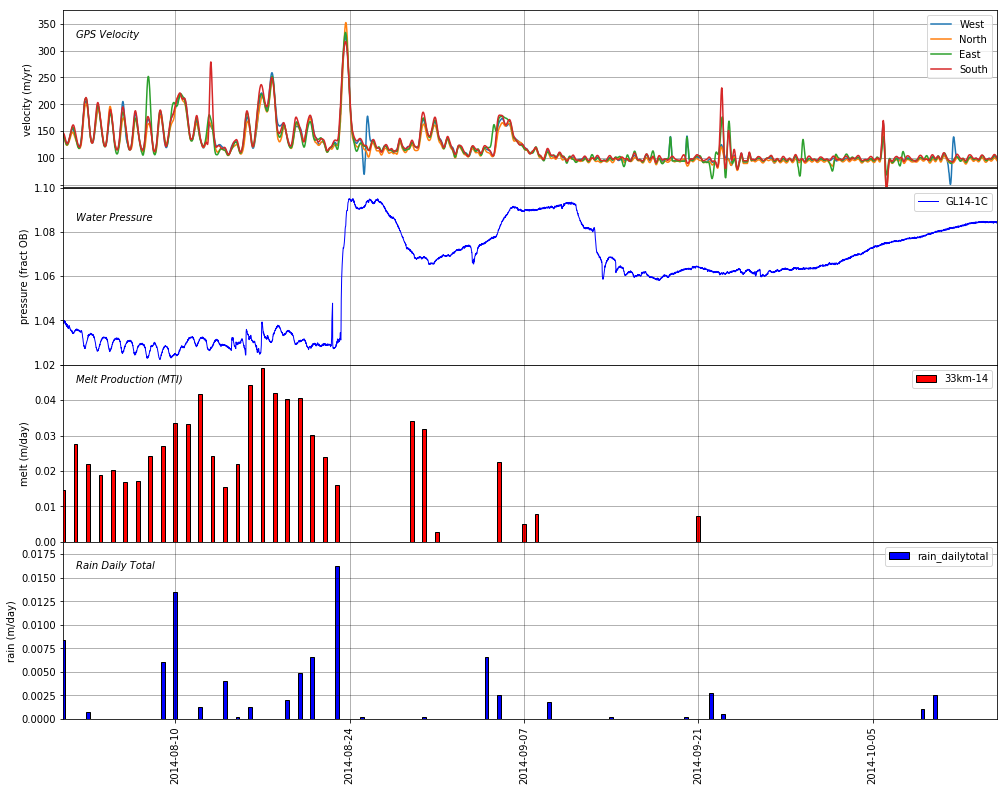

In [64]:
#!/usr/bin/env python

"""
Analysis of Fall 2014 GPS, pressure, and melt
Patrick Wright, Inversion Labs
Job: UM QSSI
Jan. 2018
"""

import datetime as dt
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib import rcParams
from dateutil.relativedelta import relativedelta
import pylab
from IPython import embed
from math import factorial
from datetime import timedelta

# Convert DOY to datetime:
def dateparser_2014(doy):
  return dt.datetime(year=2014, month=1, day=1) + dt.timedelta(days=doy) - dt.timedelta(days=1)

# set index of dataframes to datetime:
def set_index(df):
  index = pd.to_datetime(df.Datetime)
  df = df.set_index(index)
  df.index.rename('Datetime_index', inplace=True)
  df = df.drop('Datetime', axis=1)
  return df

# ------------------------------------------------------------------------------
# VELOCITY IMPORTS:
# ------------------------------------------------------------------------------

vel1 = pd.read_csv('velocity/processed_revisedJB/33km-14-West_velocity.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel1_index = pd.to_datetime(vel1['timestamp'])
vel1_index.name = 'datetimeindex'
vel1 = vel1.set_index(vel1_index)
vel1 = vel1.drop('timestamp', axis=1)

# drop suspect periods:
#vel1['':''] = np.NaN

vel2 = pd.read_csv('velocity/processed_revisedJB/33km-14-North_velocity.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel2_index = pd.to_datetime(vel2['timestamp'])
vel2_index.name = 'datetimeindex'
vel2 = vel2.set_index(vel2_index)
vel2 = vel2.drop('timestamp', axis=1)

vel3 = pd.read_csv('velocity/processed_revisedJB/33km-14-East_velocity.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel3_index = pd.to_datetime(vel3['timestamp'])
vel3_index.name = 'datetimeindex'
vel3 = vel3.set_index(vel3_index)
vel3 = vel3.drop('timestamp', axis=1)

vel4 = pd.read_csv('velocity/processed_revisedJB/33km-14-South_velocity.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel4_index = pd.to_datetime(vel4['timestamp'])
vel4_index.name = 'datetimeindex'
vel4 = vel4.set_index(vel4_index)
vel4 = vel4.drop('timestamp', axis=1)

# ------------------------------------------------------------------------------
# PRESSURE IMPORTS: 
# ------------------------------------------------------------------------------

# NOTE: These pressure data are from '~/UM_RESEARCH/water_pressure/Pressure_data_PJWpublication'
#       (this directory is replicated on Box)
# NOTE: No resample / interpolate.... just for viewing trends. Data could have uneven sampling.

GL14_1C = pd.read_csv('pressure/GL14_W_H3.txt',sep=',')

GL14_1C_index = GL14_1C['Jday_col'].map(dateparser_2014) # make a datetime index
GL14_1C_index.name = 'timestamp' # change name of index
GL14_1C_dt = GL14_1C.set_index(GL14_1C_index) # set index to datetime, re-name
GL14_1C_scaled = (9.81 * 1000 * GL14_1C_dt.m_h2o_col)  / (910 * 9.81 * 661) # pgh water column / pgh ice 
GL14_1C_scaled.name = 'scaled' # change name of series

# ------------------------------------------------------------------------------
# MELT PRODUCTION IMPORTS: NOTE: Files replaced on 12/1/17
# ------------------------------------------------------------------------------
GL14_melt = pd.read_csv('melt/melt_MTI_33km-14.csv', sep=',', header=0, names=['Datetime', 'optimized_mti'])
GL14_melt_index = pd.to_datetime(GL14_melt['Datetime'])
GL14_melt_index.name = 'timestamp'
GL14_melt = GL14_melt.set_index(GL14_melt_index)
GL14_melt = GL14_melt.drop('Datetime', axis=1)

# ------------------------------------------------------------------------------
# RAIN IMPORT (Block Site)
# ------------------------------------------------------------------------------
GL14_rain = pd.read_csv('melt/BlockSite-rain-dailytotal-meters.csv',
                        sep=',', header=0, names=['Datetime', 'rain_dailytotal_meters'])
GL14_rain_index = pd.to_datetime(GL14_rain['Datetime'])
GL14_rain_index.name = 'timestamp'
GL14_rain = GL14_rain.set_index(GL14_rain_index)
GL14_rain = GL14_rain.drop('Datetime', axis=1)

# ------------------------------------------------------------------------------
# PLOTS:
# ------------------------------------------------------------------------------

# MULTI-PANEL: velocity, pressure, melt

fig = plt.figure(figsize=(15, 12))

ax1 = plt.subplot2grid((4, 1), (0, 0)) # GPS 
ax2 = plt.subplot2grid((4, 1), (1, 0)) # water pressure 
ax3 = plt.subplot2grid((4, 1), (2, 0)) # melt production
ax4 = plt.subplot2grid((4, 1), (3, 0)) # rain

ax1.plot(vel1.index, vel1.velocity_myear, label='West')
ax1.plot(vel2.index, vel2.velocity_myear, label='North')
ax1.plot(vel3.index, vel3.velocity_myear, label='East')
ax1.plot(vel4.index, vel4.velocity_myear, label='South')

ax1.set_xlim('2014-08-01','2014-10-15')
ax1.set_ylim(45,375)
ax1.set_ylabel('velocity (m/yr)')
ax1.tick_params(axis='x', labelbottom='off')

plt.setp(ax1.get_yticklabels()[1], visible=False)

ax1.legend(loc='upper right')
ax1.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax1.annotate('GPS Velocity', (mdates.datestr2num('2014-08-02'), 325), style='oblique')


ax2.plot(GL14_1C_dt.index, GL14_1C_scaled, color='b', label='GL14-1C', linewidth=1)

ax2.set_xlim('2014-08-01','2014-10-15')
ax2.tick_params(axis='x', labelbottom='off')
ax2.set_ylim(1.02,1.10)
#ax2.set_ylim(0.935,1.01)
ax2.set_ylabel('pressure (fract OB)')

ax2.legend(loc='upper right')
ax2.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax2.annotate('Water Pressure', (mdates.datestr2num('2014-08-02'), 1.085), style='oblique')

WIDTH = 0.3
# align can only be 'center' or 'edge', where 'edge' uses left edge of bar at corresponding index
# This implementation plots bars at midnight, representing melt over following day.
ax3.bar(GL14_melt.index, GL14_melt.optimized_mti,
        width=WIDTH, edgecolor='black', color='red', align='center', label='33km-14')

ax3.xaxis_date()
ax3.set_ylabel('melt (m/day)')
ax3.set_xlim('2014-08-01','2014-10-15')
ax3.set_ylim(0,0.050)
ax3.tick_params(axis='x', labelbottom='off')

plt.setp(ax3.get_yticklabels()[-1], visible=False)

ax3.legend(loc='upper right')
ax3.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax3.annotate('Melt Production (MTI)', (mdates.datestr2num('2014-08-02'), 0.045), style='oblique')

WIDTH = 0.3
# align can only be 'center' or 'edge', where 'edge' uses left edge of bar at corresponding index
# This implementation plots bars at midnight, representing melt over following day.
ax4.bar(GL14_rain.index, GL14_rain.rain_dailytotal_meters,
        width=WIDTH, edgecolor='black', color='blue', align='center', label='rain_dailytotal')

ax4.xaxis_date()
ax4.set_ylabel('rain (m/day)')
ax4.set_xlim('2014-08-01','2014-10-15')
ax4.set_ylim(0,0.0188)

#plt.setp(ax4.get_yticklabels()[-1], visible=False)

ax4.legend(loc='upper right')
ax4.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax4.annotate('Rain Daily Total', (mdates.datestr2num('2014-08-02'), 0.016), style='oblique')

plt.subplots_adjust(wspace=0.001, hspace=0.001)
plt.subplots_adjust(
  left=0.085, right=0.95,
  top=0.95, bottom=0.13)

plt.xticks(rotation=90, fontsize=10)

plt.show()

APPLIED (GPS): remove error >2.5 cm / 15-min bin / 8-hr pos smooth / 6-hr vel / 8-hr vel smooth

**Characteristics:**
 
* Two relatively small speed-up events in late Aug and early Sept, both with associated melt production.
* No obvious changes in pressure that directly correlate with the two small speed-up events.
* Large one-day speedup event (to 350 m/yr) at end of melt season period. Corresponds to large increase in pressure (center).
* North pressure record not included (starts climbing to unrealistic values, ducer damaged?).

**Interpretation (process):**

* No obvious events during this fall period that support an argument for either "isolated" or "active".
* The large increase in velocity and pressure on Aug. 23 is very interesting. Corresponds with slowly decreasing melt production, but with a huge rain total. This rain is likely driving the acceleration. Unclear if pressure increase is related to the rain event.

# 6. Fall 2015

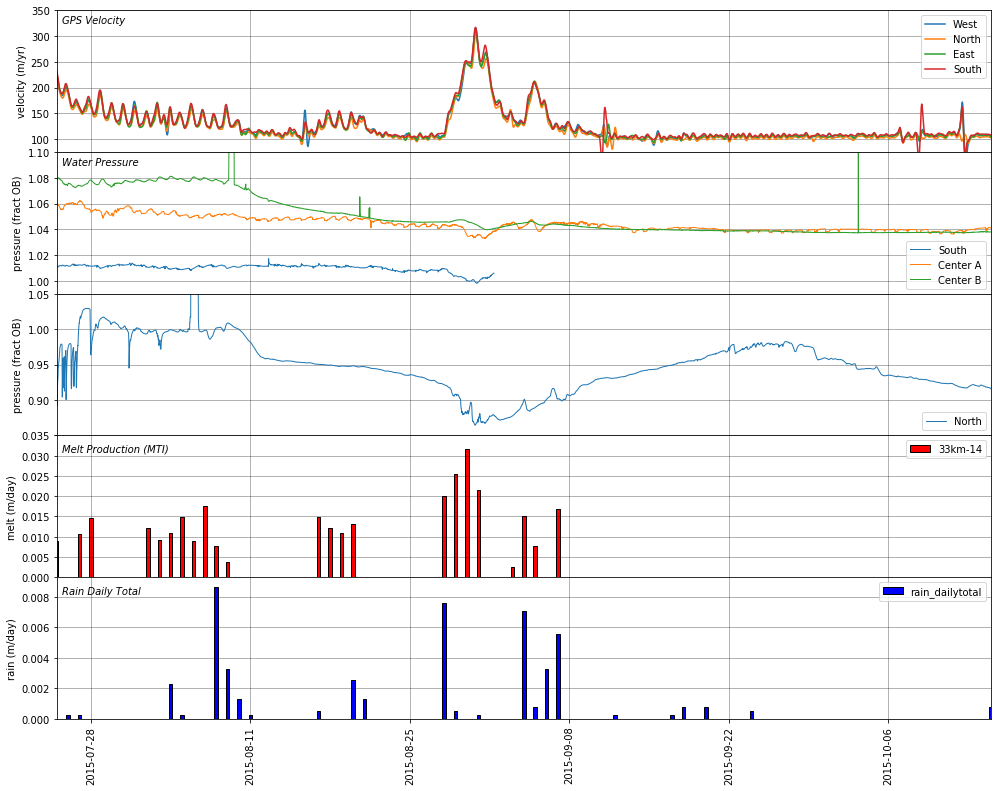

In [65]:
# ------------------------------------------------------------------------------
# VELOCITY IMPORTS:
# ------------------------------------------------------------------------------

# drop suspect periods:
#vel1['2015-08-27 13:00':'2015-08-31 10:00'] = np.NaN


# drop suspect periods:
#vel2['2015-08-27 13:00':'2015-08-31 10:00'] = np.NaN


# drop suspect periods:
#vel3['2015-08-27 13:00':'2015-08-31 10:00'] = np.NaN


# drop suspect periods:
#vel4['2015-08-27 13:00':'2015-08-31 10:00'] = np.NaN

# ------------------------------------------------------------------------------
# PRESSURE IMPORTS: 
# ------------------------------------------------------------------------------

# Panda's loading & PW pressure calculations:
#--------------------------------------------

pData15Sd = pd.read_csv('GPS_Pressure_Data_Organized/GL14/GL_grid_15S_hifreq_5min_avg.txt',sep=',', header=0, names=['DOY', 'Ps'])

pData15Sd_index = pData15Sd['DOY'].map(dateparser_2011) # make a datetime index
pData15Sd_index.name = 'timestamp' # change name of index
pData15Sd_dt = pData15Sd.set_index(pData15Sd_index) # set index to datetime, re-name
pData15Sd_scaled = (9.81 * 1000 * pData15Sd.Ps)  / (910 * 9.81 * 677) # pgh water column / pgh ice 
pData15Sd_scaled.name = 'scaled' # change name of series

pData15N0 = pd.read_csv('GPS_Pressure_Data_Organized/GL14/GL_grid_15_N_Pw_0m.txt',sep=',', header=0, names=['DOY', 'Ps'])

pData15N0_index = pData15N0['DOY'].map(dateparser_2011) # make a datetime index
pData15N0_index.name = 'timestamp' # change name of index
pData15N0_dt = pData15N0.set_index(pData15N0_index) # set index to datetime, re-name
pData15N0_scaled = (9.81 * 1000 * pData15N0.Ps)  / (910 * 9.81 * 635) # pgh water column / pgh ice 
pData15N0_scaled.name = 'scaled' # change name of series

pData15CB1 = pd.read_csv('GPS_Pressure_Data_Organized/GL14/GL_grid_15_C_B_Pw_1m.txt',sep=',', header=0, names=['DOY', 'Ps'])

pData15CB1_index = pData15CB1['DOY'].map(dateparser_2011) # make a datetime index
pData15CB1_index.name = 'timestamp' # change name of index
pData15CB1_dt = pData15CB1.set_index(pData15CB1_index) # set index to datetime, re-name
pData15CB1_scaled = (9.81 * 1000 * pData15CB1.Ps)  / (910 * 9.81 * 675) # pgh water column / pgh ice 
pData15CB1_scaled.name = 'scaled' # change name of series

pData15CAd = pd.read_csv('GPS_Pressure_Data_Organized/GL14/GL_grid_15CA_hifreq_5min_avg.txt',sep=',', header=0, names=['DOY', 'Ps'])

pData15CAd_index = pData15CAd['DOY'].map(dateparser_2011) # make a datetime index
pData15CAd_index.name = 'timestamp' # change name of index
pData15CAd_dt = pData15CAd.set_index(pData15CAd_index) # set index to datetime, re-name
pData15CAd_scaled = (9.81 * 1000 * pData15CAd.Ps)  / (910 * 9.81 * 671) # pgh water column / pgh ice 
pData15CAd_scaled.name = 'scaled' # change name of series

# ------------------------------------------------------------------------------
# PLOTS:
# ------------------------------------------------------------------------------

# MULTI-PANEL: velocity, pressure, melt

fig = plt.figure(figsize=(15, 12))

ax1 = plt.subplot2grid((5, 1), (0, 0)) # GPS 
ax2 = plt.subplot2grid((5, 1), (1, 0)) # water pressure 
ax3 = plt.subplot2grid((5, 1), (2, 0)) # water pressure 
ax4 = plt.subplot2grid((5, 1), (3, 0)) # melt production
ax5 = plt.subplot2grid((5, 1), (4, 0)) # rain

ax1.plot(vel1.index, vel1.velocity_myear, label='West')
ax1.plot(vel2.index, vel2.velocity_myear, label='North')
ax1.plot(vel3.index, vel3.velocity_myear, label='East')
ax1.plot(vel4.index, vel4.velocity_myear, label='South')

ax1.set_xlim('2015-07-25','2015-10-15')
ax1.set_ylim(75,350)
ax1.set_ylabel('velocity (m/yr)')
ax1.tick_params(axis='x', labelbottom='off')

#plt.setp(ax1.get_yticklabels()[1], visible=False)

ax1.legend(loc='upper right')
ax1.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax1.annotate('GPS Velocity', (mdates.datestr2num('2015-07-25 12:00'), 325), style='oblique')

#-------------------------------------------------------------------------------
ax2.plot(pData15Sd_dt.index, pData15Sd_scaled, label='South', linewidth=1)
#ax2.plot(pData15N0_dt.index, pData15N0_scaled, label='North', linewidth=1)
ax2.plot(pData15CAd_dt.index, pData15CAd_scaled, label='Center A', linewidth=1)
ax2.plot(pData15CB1_dt.index, pData15CB1_scaled, label='Center B', linewidth=1)


ax2.set_xlim('2015-07-25','2015-10-15')
ax2.tick_params(axis='x', labelbottom='off')
ax2.set_ylim(0.99,1.10)
#ax2.set_ylim(0.935,1.01)
ax2.set_ylabel('pressure (fract OB)')

ax2.legend(loc='lower right')
ax2.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax2.annotate('Water Pressure', (mdates.datestr2num('2015-07-25 12:00'), 1.09), style='oblique')

#-------------------------------------------------------------------------------

ax3.plot(pData15N0_dt.index, pData15N0_scaled, label='North', linewidth=1)

ax3.set_xlim('2015-07-25','2015-10-15')
ax3.tick_params(axis='x', labelbottom='off')
ax3.set_ylim(0.85,1.05)
ax3.set_ylabel('pressure (fract OB)')

plt.setp(ax3.get_yticklabels()[0], visible=False)

ax3.legend(loc='lower right')
ax3.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
#ax3.annotate('Water Pressure', (mdates.datestr2num('2015-08-15 12:00'), 1.085), style='oblique')

#-------------------------------------------------------------------------------
WIDTH = 0.3
# align can only be 'center' or 'edge', where 'edge' uses left edge of bar at corresponding index
# This implementation plots bars at midnight, representing melt over following day.
ax4.bar(GL14_melt.index, GL14_melt.optimized_mti,
        width=WIDTH, edgecolor='black', color='red', align='center', label='33km-14')

ax4.xaxis_date()
ax4.set_ylabel('melt (m/day)')
ax4.set_xlim('2015-07-25','2015-10-15')
ax4.set_ylim(0,0.035)

#plt.setp(ax4.get_yticklabels()[0], visible=False)

ax4.legend(loc='upper right')
ax4.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax4.annotate('Melt Production (MTI)', (mdates.datestr2num('2015-07-25 12:00'), 0.031), style='oblique')

#-------------------------------------------------------------------------------
WIDTH = 0.3
# align can only be 'center' or 'edge', where 'edge' uses left edge of bar at corresponding index
# This implementation plots bars at midnight, representing melt over following day.
ax5.bar(GL14_rain.index, GL14_rain.rain_dailytotal_meters,
        width=WIDTH, edgecolor='black', color='blue', align='center', label='rain_dailytotal')

ax5.xaxis_date()
ax5.set_ylabel('rain (m/day)')
ax5.set_xlim('2015-07-25','2015-10-15')
ax5.set_ylim(0,0.0093)

#plt.setp(ax5.get_yticklabels()[-1], visible=False)

ax5.legend(loc='upper right')
ax5.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax5.annotate('Rain Daily Total', (mdates.datestr2num('2015-07-25 12:00'), 0.0082), style='oblique')

plt.subplots_adjust(wspace=0.001, hspace=0.001)
plt.subplots_adjust(
  left=0.085, right=0.95,
  top=0.95, bottom=0.13)

plt.xticks(rotation=90, fontsize=10)

plt.show()

APPLIED (GPS): remove error >2.5 cm / 15-min bin / 8-hr pos smooth / 6-hr vel / 8-hr vel smooth

**Characteristics:**
 
* Very large speedup event during Aug 28-31, followed by second smaller event on Sept. 5. Both events associated with multi-day melt production. Peak velocity during the primary speedup event is of similar magnitude to the highest velocities of the season (spring speedup and this event both reach >300 m/yr).

* Water pressure in all boreholes decreases during the acceleration, particularly in the north hole. Pressure changes during the secondary speed-up event are more variable.

**Interpretation (process):**

* The decrease in pressure in all 4 boreholes during the major speedup event may indicate that this site is in a "isolated" or "weakly connected" hydraulic regime. Better velocity results will help with this interpretation.

# 7. Fall 2016

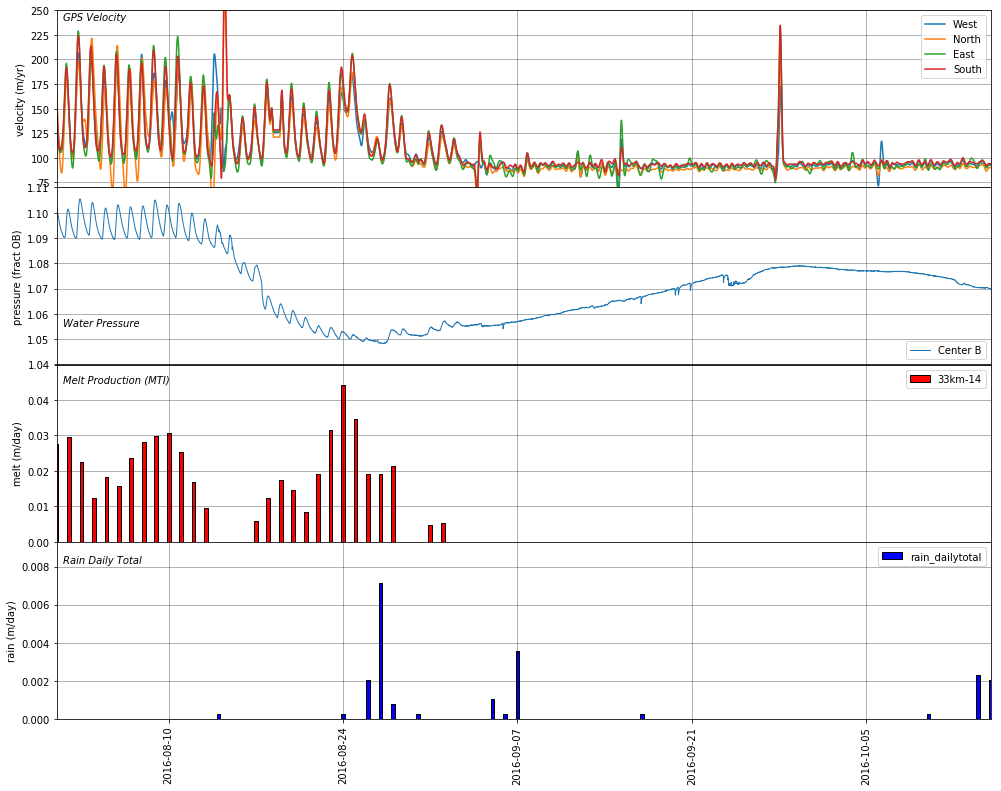

In [66]:
# ------------------------------------------------------------------------------
# VELOCITY IMPORTS:
# ------------------------------------------------------------------------------
vel1 = pd.read_csv('velocity/processed/33km-14-West_velocity.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel1_index = pd.to_datetime(vel1['timestamp'])
vel1_index.name = 'datetimeindex'
vel1 = vel1.set_index(vel1_index)
vel1 = vel1.drop('timestamp', axis=1)

# drop suspect periods:
#vel1['':''] = np.NaN

vel2 = pd.read_csv('velocity/processed/33km-14-North_velocity.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel2_index = pd.to_datetime(vel2['timestamp'])
vel2_index.name = 'datetimeindex'
vel2 = vel2.set_index(vel2_index)
vel2 = vel2.drop('timestamp', axis=1)

vel3 = pd.read_csv('velocity/processed/33km-14-East_velocity.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel3_index = pd.to_datetime(vel3['timestamp'])
vel3_index.name = 'datetimeindex'
vel3 = vel3.set_index(vel3_index)
vel3 = vel3.drop('timestamp', axis=1)

vel4 = pd.read_csv('velocity/processed/33km-14-South_velocity.csv', sep=',', header=0, names=['timestamp','DOY','velocity_myear'])
vel4_index = pd.to_datetime(vel4['timestamp'])
vel4_index.name = 'datetimeindex'
vel4 = vel4.set_index(vel4_index)
vel4 = vel4.drop('timestamp', axis=1)
# ------------------------------------------------------------------------------
# PRESSURE IMPORTS: 
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
# PLOTS:
# ------------------------------------------------------------------------------

# MULTI-PANEL: velocity, pressure, melt

fig = plt.figure(figsize=(15, 12))

ax1 = plt.subplot2grid((4, 1), (0, 0)) # GPS 
ax2 = plt.subplot2grid((4, 1), (1, 0)) # water pressure  
ax3 = plt.subplot2grid((4, 1), (2, 0)) # melt production
ax4 = plt.subplot2grid((4, 1), (3, 0)) # rain

ax1.plot(vel1.index, vel1.velocity_myear, label='West')
ax1.plot(vel2.index, vel2.velocity_myear, label='North')
ax1.plot(vel3.index, vel3.velocity_myear, label='East')
ax1.plot(vel4.index, vel4.velocity_myear, label='South')

ax1.set_xlim('2016-08-01','2016-10-15')
ax1.set_ylim(70,250)
ax1.set_ylabel('velocity (m/yr)')
ax1.tick_params(axis='x', labelbottom='off')

#plt.setp(ax1.get_yticklabels()[1], visible=False)
#plt.setp(ax1.get_yticklabels()[1], visible=False)

ax1.legend(loc='upper right')
ax1.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax1.annotate('GPS Velocity', (mdates.datestr2num('2016-08-01 12:00'), 240), style='oblique')

#-------------------------------------------------------------------------------
#ax2.plot(pData15Sd_dt.index, pData15Sd_scaled, label='South', linewidth=1)
#ax2.plot(pData15N0_dt.index, pData15N0_scaled, label='North', linewidth=1)
#ax2.plot(pData15CAd_dt.index, pData15CAd_scaled, label='Center A', linewidth=1)
ax2.plot(pData15CB1_dt.index, pData15CB1_scaled, label='Center B', linewidth=1)


ax2.set_xlim('2016-08-01','2016-10-15')
ax2.tick_params(axis='x', labelbottom='off')
ax2.set_ylim(1.04,1.11)
#ax2.set_ylim(0.935,1.01)
ax2.set_ylabel('pressure (fract OB)')

#plt.setp(ax2.get_yticklabels()[0], visible=False)

ax2.legend(loc='lower right')
ax2.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax2.annotate('Water Pressure', (mdates.datestr2num('2016-08-01 12:00'), 1.055), style='oblique')

#-------------------------------------------------------------------------------
WIDTH = 0.3
# align can only be 'center' or 'edge', where 'edge' uses left edge of bar at corresponding index
# This implementation plots bars at midnight, representing melt over following day.
ax3.bar(GL14_melt.index, GL14_melt.optimized_mti,
        width=WIDTH, edgecolor='black', color='red', align='center', label='33km-14')

ax3.xaxis_date()
ax3.set_ylabel('melt (m/day)')
ax3.set_xlim('2016-08-01','2016-10-15')
ax3.set_ylim(0,0.05)

plt.setp(ax3.get_yticklabels()[-1], visible=False)

ax3.legend(loc='upper right')
ax3.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax3.annotate('Melt Production (MTI)', (mdates.datestr2num('2016-08-01 12:00'), 0.045), style='oblique')

#-------------------------------------------------------------------------------
WIDTH = 0.3
# align can only be 'center' or 'edge', where 'edge' uses left edge of bar at corresponding index
# This implementation plots bars at midnight, representing melt over following day.
ax4.bar(GL14_rain.index, GL14_rain.rain_dailytotal_meters,
        width=WIDTH, edgecolor='black', color='blue', align='center', label='rain_dailytotal')

ax4.xaxis_date()
ax4.set_ylabel('rain (m/day)')
ax4.set_xlim('2016-08-01','2016-10-15')
ax4.set_ylim(0,0.0093)

#plt.setp(ax4.get_yticklabels()[-1], visible=False)

ax4.legend(loc='upper right')
ax4.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)
ax4.annotate('Rain Daily Total', (mdates.datestr2num('2016-08-01 12:00'), 0.0082), style='oblique')

plt.subplots_adjust(wspace=0.001, hspace=0.001)
plt.subplots_adjust(
  left=0.085, right=0.95,
  top=0.95, bottom=0.13)

#plt.legend()

plt.xticks(rotation=90, fontsize=10)

#plt.savefig('meltvelocity.svg', format='svg')

plt.show()

APPLIED (GPS): remove error >2.5 cm / 15-min bin / 8-hr pos smooth / 6-hr vel / 8-hr vel smooth

**Characteristics:**
 
* No significant fall speedup events present.
* Pressure decreases towards end of melt season, then starts increasing throughout Sept.

# 8. Fall 2017

NO ANALYSIS COMPLETED. Spring and summer only. One pressure record (center).

# 9. Winter speedup

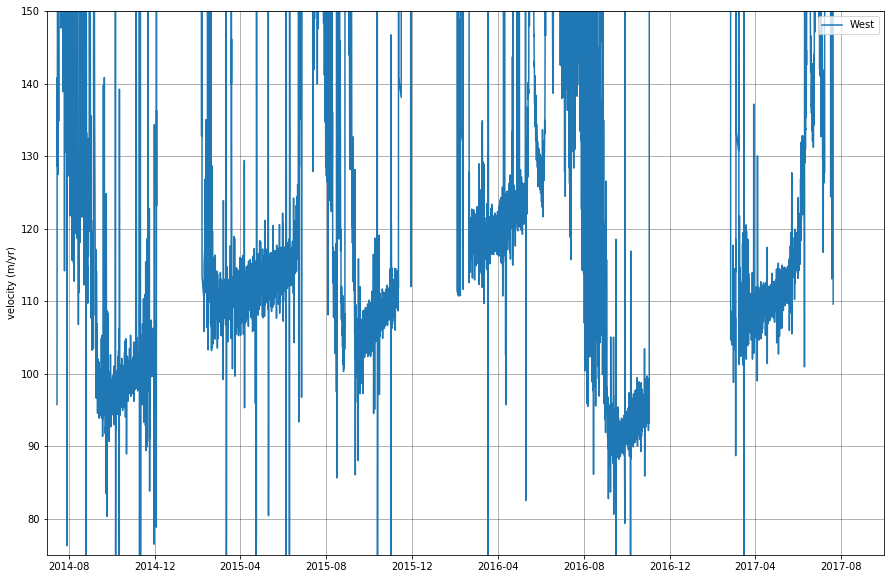

In [67]:
fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot2grid((1, 1), (0, 0)) # GPS 

ax1.plot(vel1.index, vel1.velocity_myear, label='West')
#ax1.plot(vel2.index, vel2.velocity_myear, label='North')
#ax1.plot(vel3.index, vel3.velocity_myear, label='East')
#ax1.plot(vel4.index, vel4.velocity_myear, label='South')

ax1.set_xlim('2014-07-01','2017-10-01')
ax1.set_ylim(75,150)
ax1.set_ylabel('velocity (m/yr)')
ax1.tick_params(axis='x', labelbottom='on')

ax1.legend(loc='upper right')
ax1.grid(color='black', alpha=0.3, linestyle='-', linewidth=1)

**Characteristics:**
 
* Slow increase in velocity over the winter period is consistent for all years of measurement.
* NOTE: see new notebook "GrIS winter GPS velocity (2011-2017)" for winter speedup analysis.